In [6]:
import sys
sys.path.append('..')
print(sys.path)



['C:\\Users\\adware\\Desktop\\KISS', '\\\\engin-storage.m.storage.umich.edu\\engin-storage\\adware\\windat.V2\\Desktop\\KISS\\KISS\\shipClassTests\\ \\engin-storage.m.storage.umich.edu\\engin-storage\\adware\\windat.V2\\Desktop\\KISS', 'c:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'c:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'c:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'c:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313', '', 'C:\\Users\\adware\\AppData\\Roaming\\Python\\Python313\\site-packages', 'C:\\Users\\adware\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32', 'C:\\Users\\adware\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32\\lib', 'C:\\Users\\adware\\AppData\\Roaming\\Python\\Python313\\site-packages\\Pythonwin', 'c:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages', '..']


### component model : markov chain

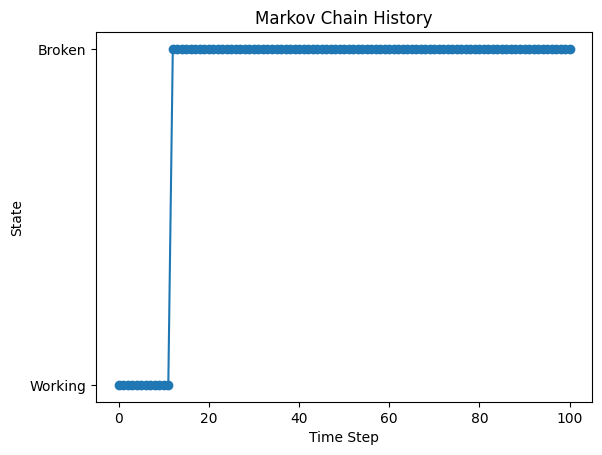

In [2]:
import numpy as np

from shipClass.Component import Component

# setup the component as a Markov Chain
states = {0: 'Working', 
          1: 'Broken'}
transition_mat = np.array([[0.99, 0.01], 
                           [0, 1]])

c1 = Component("comp1", states, transition_mat)
c1.simulate(100)
c1.plotHistory()


# testing sensed component

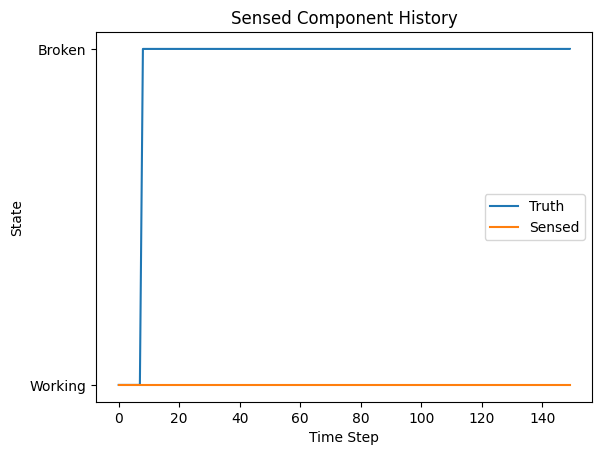

Broken


In [23]:
# testing 1 sensor attached to 1 component 

from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp

import numpy as np

states={0: 'Working', 1: 'Broken'}
comp_transition_matrix = np.array([[0.99, 0.01], [0, 1]])
sensor_transition_matrix = np.array([[0.5, 0.5], [0, 1]])

c1 = Component("comp1", states, comp_transition_matrix)
s1 = Sensor("sensor1", states, sensor_transition_matrix)

sc1 = SensedComp(c1, s1)
sc1.simulate(150)
sc1.plotHistory()

print(sc1.sensors.currentState())

# adding maintenance

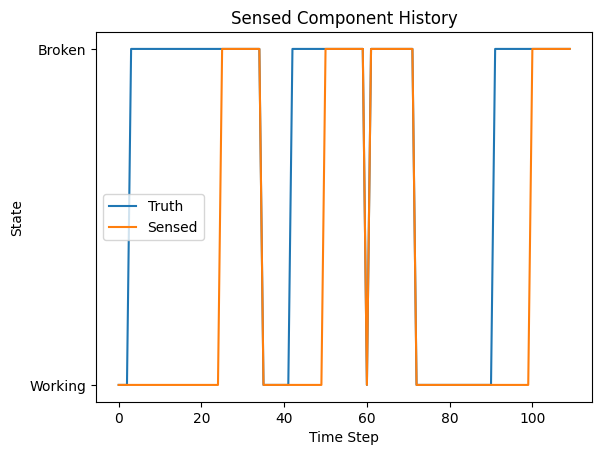

In [273]:
# testing sensedComponent with maintenance

from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp
from Maintainer import Maintainer

import numpy as np

# initialize a sensed component
comp_states={0: 'Working', 1: 'Broken'}
comp_transition_matrix = np.array([[0.75, 0.25], [0, 1]])
c1 = Component("comp1", comp_states, comp_transition_matrix)
sensor_states={0: 'Working', 1: 'Broken'}
sensor_transition_matrix = np.array([[0.75, 0.25], [0, 1]])
s1 = Sensor("sensor1", sensor_states, sensor_transition_matrix)
sc1 = SensedComp(c1, s1)

# initialize a maintainer
maint_man = Maintainer()

# simulate the sensed component for n steps
num_steps = 100
while len(sc1.history) < num_steps:
    sc1.simulate(1)                 # simulate the markov chain
    sc1 = maint_man.diagnose(sc1)   # check if the part needs repair

    sc1 = maint_man.preventive_maintaince(sc1) # perform preventative maintenance if its scheduled

sc1.plotHistory()


more stuff below

In [5]:
sim_sample_time = 1 # seconds
sim_time = 90       # days

# run the simulation
c1.run_simulation(sim_time, sim_sample_time)

# plot the results
c1.history.plot(title='Component History', xlabel='Time (days)', ylabel='State', legend=True)

AttributeError: 'Component' object has no attribute 'run_simulation'

### plotting various shapes using stats originally

In [ ]:
betas = [0.2, 1.0, 5]
for beta in betas:
    comp = Component("Engine", shape=beta, scale= 20)

    comp.plotDistros()

TypeError: Component.__init__() got an unexpected keyword argument 'shape'

### initializing markov chain

In [ ]:
from shipClass.Component import Component

c1 = Component("Engine")

states = ["Working", "Failed"]
transitionMatrix = [[0.5, 0.5], [0.5, 0]]

c1.simulate(10)

TypeError: Component.__init__() missing 3 required positional arguments: 'MTTF', 'states', and 'transition_matrix'

### examining the component reliability model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from shipClass.Component import Component

# simulate 1000 components and determine the MTTF of the Markov Chains
num_comps = 1000
sim_time = 300

mean_failure_times = []
for i in range(num_comps): 
    comp = Component('Test_Component', 200)
    comp.simulate(sim_time)    
    mean_failure_times.append(comp.failure_times.mean())

# plot a reliability curve for a single component
plt.plot(comp.failure_times, comp.reliability_curve)

# print the mean time to failure of all tested comps
print("Mean Time to Failure: ", np.mean(mean_failure_times))
    

TypeError: Component.__init__() missing 2 required positional arguments: 'states' and 'transition_matrix'

In [ ]:
print(comp.mC_model.history[-10])


Testing OOP chapter 3 changes

In [ ]:
from shipClass.Component import Component as comp

c1 = comp.Component("Engine", 200)

TypeError: module() takes at most 2 arguments (3 given)

In [ ]:
import sys

# Add your desired path
sys.path.append('\\engin-storage.m.storage.umich.edu\engin-storage\adware\windat.V2\Desktop\KISS\shipClass')

# Verify the path has been added
print(sys.path)

['\\\\engin-storage.m.storage.umich.edu\\engin-storage\\adware\\windat.V2\\Desktop\\KISS\\KISS\\shipClass\\object_test', '\\\\engin-storage.m.storage.umich.edu\\engin-storage\\adware\\windat.V2\\Desktop\\KISS', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0', '', 'C:\\Users\\adware\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages', 'C:\\Users\\adware\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\win32', 'C:\\Users\\adware\\AppData\\Local

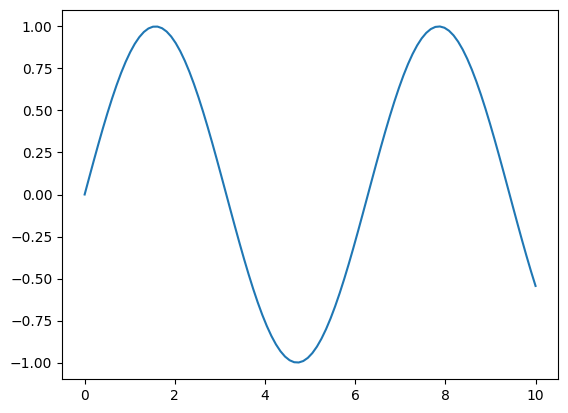

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plot a sine wave
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()
